In [84]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [85]:
matrix = [
[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
]

In [86]:
G = nx.Graph()


<h5> 1. Превратить граф из ПЗ1-2 во взвешенный, веса - целые числа, распределенные случайным образом</h5>

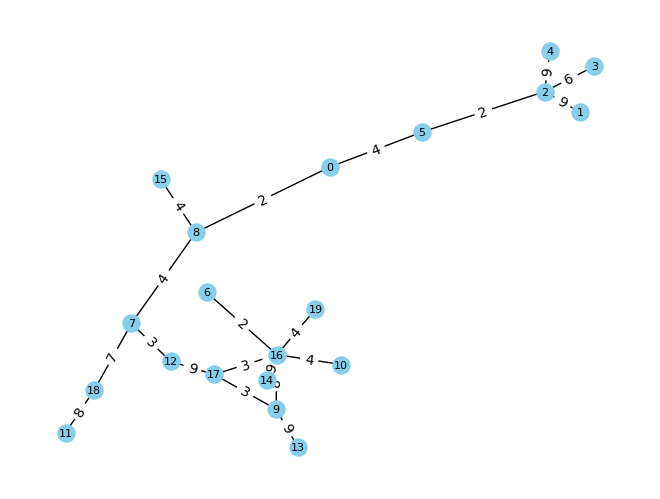

In [87]:
#добавляем к ребрам вес
for i in range(len(matrix)):
    for j in range(len(matrix[i])):
        if matrix[i][j] == 1:
            weight = np.random.randint(1, 10)
            G.add_edge(i, j, weight=weight)

pos = nx.spring_layout(G)
edge_labels = {(i, j): G[i][j]['weight'] for i, j in G.edges()}

nx.draw(G, pos, with_labels=True, node_size=150, node_color='skyblue', font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()


<h5>2. Выполнить поиск минимального пути из вершины А в Б (А и Б задаются пользователем) поиском в ширину и в глубину, сделать выводы какой поиск эффективнее. Вывести маршрут и его вес</h5>

In [90]:
import networkx as nx
import numpy as np

# Ваша матрица смежности с весами рёбер
matrix = [
    [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    # ... (вставьте остальные строки матрицы)
]

# Создание графа и добавление весов к рёбрам
G = nx.Graph()

for i in range(len(matrix)):
    for j in range(len(matrix[i])):
        if matrix[i][j] == 1:
            weight = np.random.randint(1, 10)
            G.add_edge(i, j, weight=weight)

# Ввод пользователем вершин A и B
start_node = int(input("Введите вершину A: "))
end_node = int(input("Введите вершину B: "))

# Поиск в ширину
bfs_tree = nx.bfs_tree(G, source=start_node)
bfs_path = list(nx.shortest_path(bfs_tree, source=start_node, target=end_node))
bfs_length = nx.shortest_path_length(bfs_tree, source=start_node, target=end_node)
print(f"Минимальный путь поиска в ширину: {bfs_path}")
print(f"Длина пути: {bfs_length}")


NetworkXError: The node 4 is not in the graph.